In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import statsmodels.formula.api as smf
import semopy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_theme(rc = {'figure.figsize':(18,12)})

In [17]:
data_dir = '../../Data/'
df = gpd.read_file(os.path.join(data_dir, 'flood_ipc_covariates.gpkg')).drop('index', 1)

In [10]:
df.iloc[:, 9:19] = df.iloc[:, 9:19].astype('double')
df = df.rename(columns = {'Displacement incidents (flood estimate, IDMC)': 'displaced_flood_idmc',
                          'Displacement incidents (disaster, IDMC)': 'displaced_disaster_idmc',
                          'Flood estimate exact (IDMC)': 'flood_confirmed_idmc',
                          'Flash floods (IDMC)': 'flash_idmc',
                          'Displacement incidents (flash floods, IDMC)': 'displaced_flash_idmc',
                          'Total affected (floods, EM-DAT)': 'affected_flood_emdat',
                          'Flash floods (EM-DAT)': 'flash_confirmed_emdat',
                         'Total affected (flash floods, EM-DAT)': 'displaced_flash_emdat'})

In [18]:
df.loc[(df['ISO'] == 'NGA') & (df['Year'] == 2012)]

,ID_0,ISO,Name,OBJECTID_1,POP2000,SQKM,POPSQKM,GID_0,Year,flood_extent,...,mean_staple_price_3,"Displacement incidents (disaster, IDMC)",Flood estimate exact (IDMC),"Displacement incidents (flood estimate, IDMC)",Flash floods (IDMC),"Displacement incidents (flash floods, IDMC)","Total affected (floods, EM-DAT)",Flash floods (EM-DAT),"Total affected (flash floods, EM-DAT)",geometry
56,163.0,NGA,Nigeria,166.0,113861753.0,912038.625,124.843126,None,2012,None,...,1.33743611146595,3900000.0,0,3315000.0,NaN,NaN,7000867.0,0.0,0.0,"MULTIPOLYGON (((6.44042 4.30875, 6.44042 4.307..."
57,163.0,NGA,Nigeria,166.0,113861753.0,912038.625,124.843126,None,2013,None,...,1.536175881703105,117000.0,0,99450.0,NaN,NaN,81506.0,0.0,0.0,"MULTIPOLYGON (((6.44042 4.30875, 6.44042 4.307..."
58,163.0,NGA,Nigeria,166.0,113861753.0,912038.625,124.843126,None,2014,0.03042020437554908,...,1.33285437566475,3000.0,0,2550.0,NaN,NaN,10000.0,0.0,0.0,"MULTIPOLYGON (((6.44042 4.30875, 6.44042 4.307..."
59,163.0,NGA,Nigeria,166.0,113861753.0,912038.625,124.843126,None,2015,0.03452153110332288,...,0.9702720063265249,100000.0,0,85000.0,NaN,NaN,100420.0,0.0,0.0,"MULTIPOLYGON (((6.44042 4.30875, 6.44042 4.307..."
60,163.0,NGA,Nigeria,166.0,113861753.0,912038.625,124.843126,None,2016,0.03209580946540315,...,1.50403279664514,78000.0,0,66300.0,NaN,NaN,12000.0,0.0,0.0,"MULTIPOLYGON (((6.44042 4.30875, 6.44042 4.307..."
61,163.0,NGA,Nigeria,166.0,113861753.0,912038.625,124.843126,None,2017,0.02947474126091631,...,1.64235946387485,122000.0,1,120000.0,0.0,0.0,10500.0,0.0,0.0,"MULTIPOLYGON (((6.44042 4.30875, 6.44042 4.307..."
62,163.0,NGA,Nigeria,166.0,113861753.0,912038.625,124.843126,None,2018,0.03827615631672682,...,1.363711026194485,613000.0,1,604900.0,0.0,0.0,1938204.0,0.0,0.0,"MULTIPOLYGON (((6.44042 4.30875, 6.44042 4.307..."


In [5]:
df.columns

Index(['ID_0', 'ISO', 'Name', 'OBJECTID_1', 'POP2000', 'SQKM', 'POPSQKM',
       'GID_0', 'Year', 'flood_extent', 'mean_flood_duration', 'mean_ipc_0',
       'mean_ipc_1', 'mean_ipc_2', 'mean_ipc_3', 'mean_staple_price_0',
       'mean_staple_price_1', 'mean_staple_price_2', 'mean_staple_price_3',
       'displaced_disaster_idmc', 'flood_confirmed_idmc',
       'displaced_flood_idmc', 'flash_idmc', 'displaced_flash_idmc',
       'affected_flood_emdat', 'flash_confirmed_emdat',
       'displaced_flash_emdat', 'geometry'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_0,75.0,1.565333e+02,6.801914e+01,38.000000,1.180000e+02,1.530000e+02,2.180000e+02,2.560000e+02
OBJECTID_1,75.0,1.681333e+02,6.196977e+01,22.000000,1.480000e+02,1.640000e+02,2.200000e+02,2.530000e+02
POP2000,75.0,2.242886e+07,2.861161e+07,0.000000,8.777879e+06,1.135080e+07,2.330016e+07,1.138618e+08
SQKM,75.0,8.290951e+05,5.688772e+05,0.000000,2.737192e+05,7.886289e+05,1.168002e+06,2.337027e+06
POPSQKM,75.0,3.676553e+01,3.889206e+01,0.000000,6.751101e+00,1.672991e+01,5.555615e+01,1.248431e+02
Year,176.0,2.014000e+03,3.171300e+00,2009.000000,2.011000e+03,2.014000e+03,2.017000e+03,2.019000e+03
flood_extent,80.0,1.508540e-02,1.098180e-02,0.002174,5.794782e-03,1.264112e-02,2.167188e-02,4.906519e-02
mean_flood_duration,80.0,1.471350e+01,4.977633e+00,5.761641,1.074571e+01,1.476798e+01,1.699702e+01,3.118969e+01
mean_ipc_0,80.0,1.194301e+00,7.066705e-01,0.000000,9.883658e-01,1.032748e+00,1.691956e+00,2.978762e+00
mean_ipc_1,80.0,1.252748e+00,6.595605e-01,0.000228,9.992166e-01,1.173778e+00,1.616259e+00,3.191109e+00


# Plots

### Look at Mean IPC immediately after rainy season

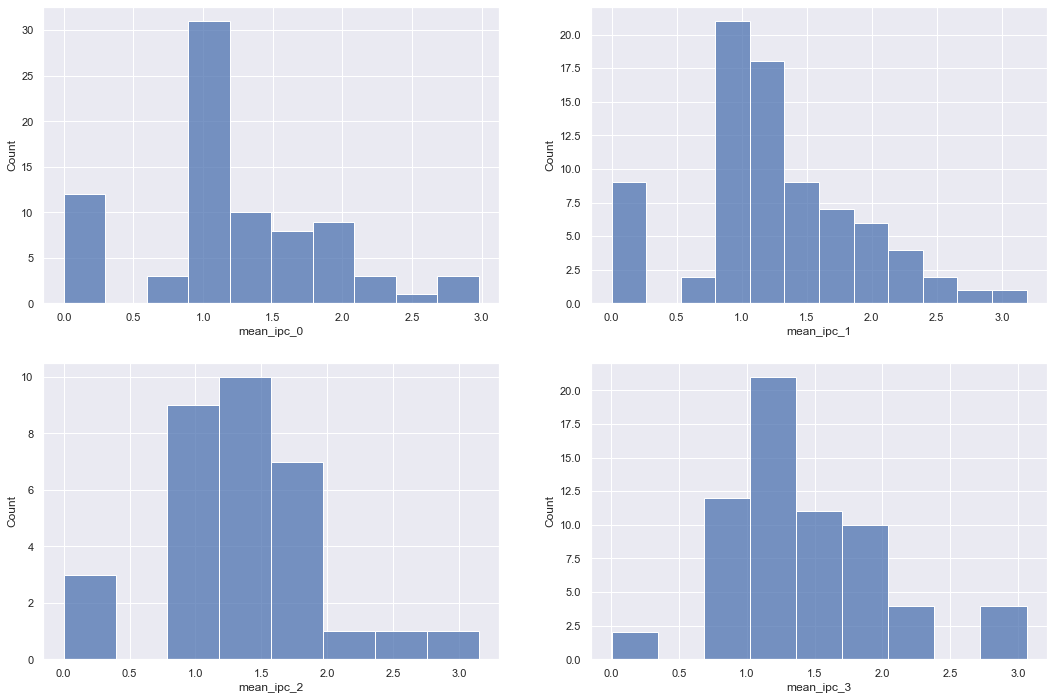

In [197]:
fig, ax = plt.subplots(2,2)
sns.histplot(ax = ax[0][0], data = df.mean_ipc_0)
sns.histplot(ax = ax[0][1], data = df.mean_ipc_1)
sns.histplot(ax = ax[1][0], data = df.mean_ipc_2)
sns.histplot(ax = ax[1][1], data = df.mean_ipc_3)

plt.show()

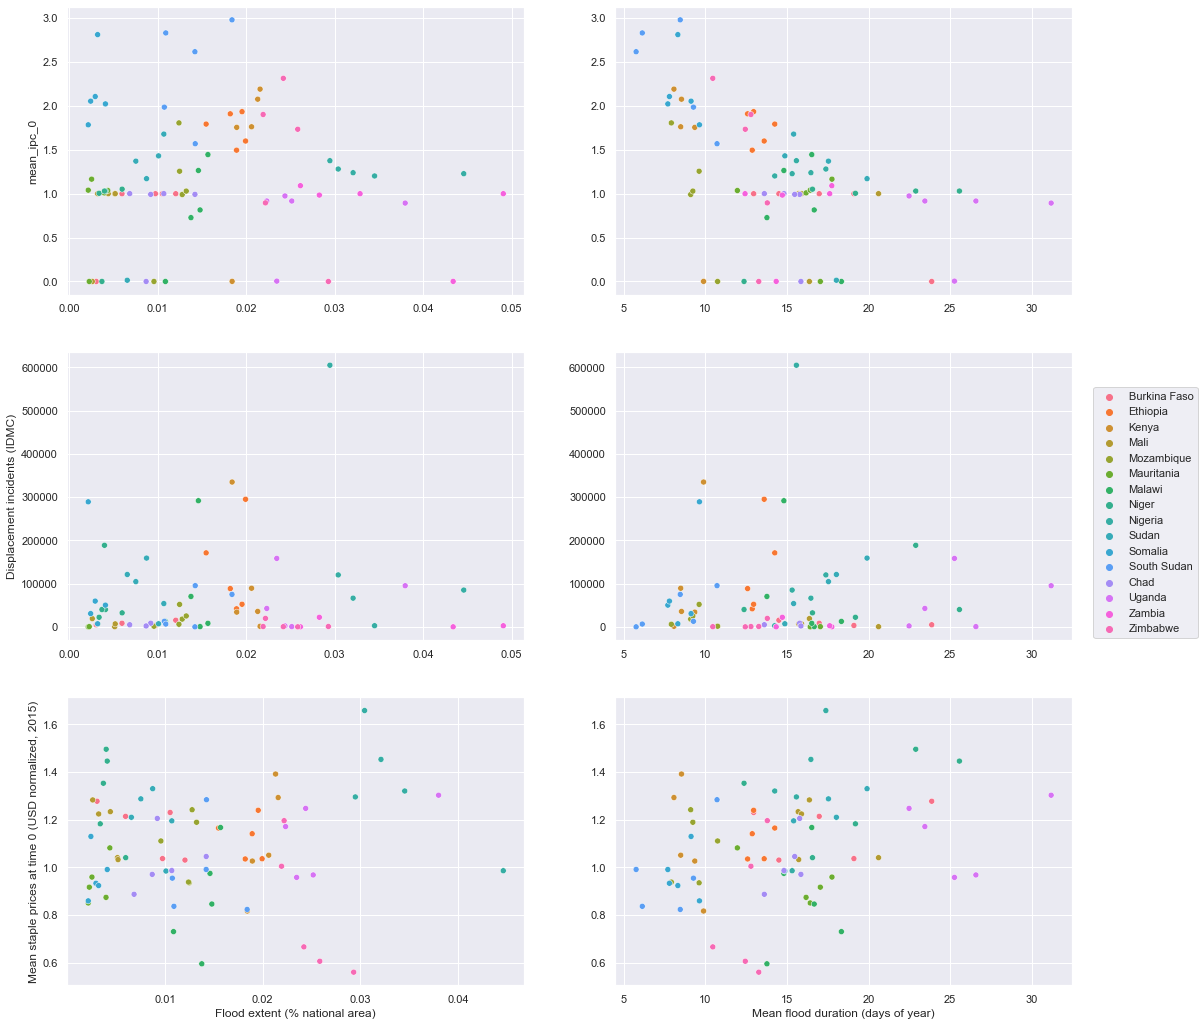

In [12]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 18))

sns.scatterplot(ax = ax[0][0], x = "flood_extent", y = "mean_ipc_0", hue = 'Name', data = df, 
                legend = False).set(xlabel = None)
sns.scatterplot(ax = ax[0][1], x = "mean_flood_duration", y = "mean_ipc_0", hue = 'Name', data = df, 
                legend = False).set(xlabel = None, ylabel = None)
sns.scatterplot(ax = ax[1][0], x = "flood_extent", y = "displaced_flood_idmc", 
            hue = 'Name', data = df, legend = False).set(ylabel = "Displacement incidents (IDMC)", xlabel = None)
sns.scatterplot(ax = ax[1][1], x = "mean_flood_duration", y = "displaced_flood_idmc",
            hue = 'Name', data = df, legend = False).set(ylabel = None, xlabel = None)
sns.scatterplot(ax = ax[2][0], x = "flood_extent", y = "mean_staple_price_0", 
            hue = 'Name', data = df, legend = False).set(xlabel = 'Flood extent (% national area)', ylabel = "Mean staple prices at time 0 (USD normalized, 2015)")
sns.scatterplot(ax = ax[2][1], x = "mean_flood_duration", y = "mean_staple_price_0",
            hue = 'Name', data = df).set(xlabel = 'Mean flood duration (days of year)', ylabel = None)

handles, labels = ax[2][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
ax[2][1].legend_.remove()


plt.show()
    

# Mixed effects models: flood effects on IPC ratings

Below, I fit mixed effects models for each time step using the two flood covariates--flood extent and and mean flood duration--and random slopes/intercepts. This yields convergence warnings, likely because the number of parameters we're using exceed the number of data points available per group.

In [62]:
flood_model_0 = smf.mixedlm('mean_ipc_0 ~ flood_extent + mean_flood_duration',
                         data = df[(df.mean_ipc_0.notnull()) & (df.mean_ipc_0 != 0)], groups = 'Name',
                           re_formula = "~ flood_extent + mean_flood_duration").fit()

flood_model_1 = smf.mixedlm('mean_ipc_1 ~ flood_extent + mean_flood_duration + mean_ipc_0',
                         data = df[(df.mean_ipc_0.notnull()) & (df.mean_ipc_0 != 0) &
                                  (df.mean_ipc_1.notnull()) & (df.mean_ipc_1 != 0)], groups = 'Name',
                           re_formula = "~ flood_extent + mean_flood_duration").fit()

flood_model_2 = smf.mixedlm('mean_ipc_2 ~ flood_extent + mean_flood_duration + mean_ipc_1',
                         data = df[(df.mean_ipc_1.notnull()) & (df.mean_ipc_1 != 0) &
                                  (df.mean_ipc_2.notnull()) & (df.mean_ipc_2 != 0)], groups = 'Name',
                           re_formula = "~ flood_extent + mean_flood_duration").fit()

flood_model_3 = smf.mixedlm('mean_ipc_3 ~ flood_extent + mean_flood_duration + mean_ipc_2',
                         data = df[(df.mean_ipc_2.notnull()) & (df.mean_ipc_2 != 0) &
                                  (df.mean_ipc_3.notnull()) & (df.mean_ipc_3 != 0)], groups = 'Name',
                           re_formula = "~ flood_extent + mean_flood_duration").fit()

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization fa

In [63]:
print(flood_model_0.summary())
print(flood_model_1.summary())
print(flood_model_2.summary())
print(flood_model_3.summary())

                     Mixed Linear Model Regression Results
Model:                    MixedLM         Dependent Variable:         mean_ipc_0
No. Observations:         74              Method:                     REML      
No. Groups:               16              Scale:                      0.2124    
Min. group size:          4               Log-Likelihood:             -53.8493  
Max. group size:          5               Converged:                  Yes       
Mean group size:          4.6                                                   
--------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z   P>|z| [0.025 0.975]
--------------------------------------------------------------------------------
Intercept                               2.038                                   
flood_extent                            2.450    3.492 0.702 0.483 -4.393  9.294
mean_flood_duration                    -0.058     

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2711: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2711: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


In [56]:
flood_model_0.pvalues

Intercept                                      NaN
flood_extent                              0.482797
mean_flood_duration                            NaN
Name Var                                  0.189145
Name x flood_extent Cov                   0.999775
flood_extent Var                               NaN
Name x mean_flood_duration Cov                 NaN
flood_extent x mean_flood_duration Cov         NaN
mean_flood_duration Var                        NaN
dtype: float64

We see that flood extent is never significant, so below, I fit a few models just using mean flood duration to see how the results vary.

In [14]:
flood_model_0_2 = smf.mixedlm('mean_ipc_0 ~ mean_flood_duration',
                         data = df[df.mean_ipc_0 != 0], groups = 'Name',
                           re_formula = "~ mean_flood_duration", missing = 'drop').fit()
flood_model_0_2.summary()

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Mixed Linear Model Regression Results
=========================================================================
Model:                   MixedLM      Dependent Variable:      mean_ipc_0
No. Observations:        74           Method:                  REML      
No. Groups:              16           Scale:                   0.2123    
Min. group size:         4            Log-Likelihood:          -57.0929  
Max. group size:         5            Converged:               Yes       
Mean group size:         4.6                                             
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       2.022    0.176 11.505 0.000  1.677  2.366
mean_flood_duration            -0.055    0.009 -6.184 0.000 -0.072 -0.037
Name Var                        0.337    0.468                           
Name x mean_flood_duration Cov -0.016    0.027                           
mean_flood_duration Var         0.001    0.001                           
=========================================================================

"""

In [16]:
flood_model_1_2 = smf.mixedlm('mean_ipc_1 ~ mean_flood_duration + mean_ipc_0',
                         data = df[(df.mean_ipc_0 != 0) &
                                  (df.mean_ipc_1 != 0)], groups = 'Name', missing = 'drop',
                           re_formula = "~ mean_flood_duration").fit()
flood_model_1_2.summary()

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Mixed Linear Model Regression Results
=========================================================================
Model:                   MixedLM      Dependent Variable:      mean_ipc_1
No. Observations:        74           Method:                  REML      
No. Groups:              16           Scale:                   0.2549    
Min. group size:         4            Log-Likelihood:          -61.8068  
Max. group size:         5            Converged:               Yes       
Mean group size:         4.6                                             
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       1.094    0.351  3.120 0.002  0.407  1.782
mean_flood_duration            -0.017    0.017 -1.031 0.303 -0.049  0.015
mean_ipc_0                      0.295    0.121  2.442 0.015  0.058  0.532
Name Var                        0.236    1.586                           
Name x mean_flood_duration Cov -0.013    0.108                           
mean_flood_duration Var         0.001    0.006                           
=========================================================================

"""

In [ ]:
flood_model_2_2 = smf.mixedlm('mean_ipc_2 ~ mean_flood_duration + mean_ipc_1',
                         data = df[(df.mean_ipc_1.notnull()) & (df.mean_ipc_1 != 0) &
                                  (df.mean_ipc_2.notnull()) & (df.mean_ipc_2 != 0)], groups = 'Name',
                           re_formula = "~ mean_flood_duration").fit()

In [13]:
flood_model_3_2 = smf.mixedlm('mean_ipc_3 ~ mean_flood_duration + mean_ipc_2',
                         data = df[(df.mean_ipc_2.notnull()) & (df.mean_ipc_2 != 0) &
                                  (df.mean_ipc_3.notnull()) & (df.mean_ipc_3 != 0)], groups = 'Name',
                           re_formula = "~ mean_flood_duration").fit()

ValueError: Shape mismatch between endog/exog and extra 2d arrays given to model.

In [35]:
print(flood_model_0_2.summary())
print(flood_model_1_2.summary())
print(flood_model_2_2.summary())
print(flood_model_3_2.summary())

                  Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      mean_ipc_0
No. Observations:        74           Method:                  REML      
No. Groups:              16           Scale:                   0.2120    
Min. group size:         4            Log-Likelihood:          -56.6852  
Max. group size:         5            Converged:               Yes       
Mean group size:         4.6                                             
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       2.063    0.201 10.291 0.000  1.670  2.456
mean_flood_duration            -0.057    0.015 -3.853 0.000 -0.086 -0.028
Name Var                        0.289    0.456                           
Name x mean_flood_duration Cov -0.013    0.031          

## Restrict geography

One shortcoming of our flood data is that it represents an annual aggregation of flood events for each country on a January – December calendar. We assume that the majority of flood events happen during the summer monsoon season (June – September), but this assumption doesn't hold for the eastern and southeastern countries with bimodal rainy seasons or rainy seasons which occur over December – February. Below, I filter the original dataset to West African countries whose rainy seasons fit our assumptions and run the above models.

In [36]:
df_wa = df[df.Name.isin(['Mauritania', 'Mali', 'Burkina Faso', 'Niger', 'Nigeria', 'Chad', 'Sudan', 'South Sudan'])]

In [51]:
flood_model_0_3 = smf.mixedlm('mean_ipc_0 ~ flood_extent + mean_flood_duration + mean_staple_price_0',
                         data = df_wa[(df_wa.mean_ipc_0.notnull()) & (df_wa.mean_ipc_0 != 0)], groups = 'Name',
                           re_formula = "~ flood_extent + mean_flood_duration").fit()

flood_model_1_3 = smf.mixedlm('mean_ipc_1 ~ flood_extent + mean_flood_duration + mean_ipc_0 + mean_staple_price_1',
                         data = df_wa[(df_wa.mean_ipc_0.notnull()) & (df_wa.mean_ipc_0 != 0) &
                                  (df_wa.mean_ipc_1.notnull()) & (df_wa.mean_ipc_1 != 0)], groups = 'Name',
                           re_formula = "~ flood_extent + mean_flood_duration").fit()

flood_model_2_3 = smf.mixedlm('mean_ipc_2 ~ flood_extent + mean_flood_duration + mean_ipc_1 + mean_staple_price_2',
                         data = df_wa[(df_wa.mean_ipc_1.notnull()) & (df_wa.mean_ipc_1 != 0) &
                                  (df_wa.mean_ipc_2.notnull()) & (df_wa.mean_ipc_2 != 0)], groups = 'Name',
                           re_formula = "~ flood_extent + mean_flood_duration").fit()

flood_model_3_3 = smf.mixedlm('mean_ipc_3 ~ flood_extent + mean_flood_duration + mean_ipc_2 + mean_staple_price_3',
                         data = df_wa[(df_wa.mean_ipc_2.notnull()) & (df_wa.mean_ipc_2 != 0) &
                                  (df_wa.mean_ipc_3.notnull()) & (df_wa.mean_ipc_3 != 0)], groups = 'Name',
                           re_formula = "~ flood_extent + mean_flood_duration").fit()

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization fa

In [52]:
print(flood_model_0_3.summary())
print(flood_model_1_3.summary())
print(flood_model_2_3.summary())
print(flood_model_3_3.summary())

                      Mixed Linear Model Regression Results
Model:                      MixedLM         Dependent Variable:         mean_ipc_0
No. Observations:           37              Method:                     REML      
No. Groups:                 8               Scale:                      0.1759    
Min. group size:            4               Log-Likelihood:             -21.6715  
Max. group size:            5               Converged:                  Yes       
Mean group size:            4.6                                                   
----------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
----------------------------------------------------------------------------------
Intercept                               1.891    0.757  2.498 0.012   0.407  3.374
flood_extent                           12.574   37.372  0.336 0.737 -60.673 85.821
mean_flood_duration        

/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2711: RuntimeWarning: invalid value encountered in sqrt
  sdf[0:self.k_fe, 1] = np.sqrt(np.diag(self.cov_params()[0:self.k_fe]))


The above suggests that neither mean flood duration nor flood extent are significant predictors of mean IPC rating for any of the selected West African countries. While we see some significance in the final time step, there is not really enough data in that model for us to be super confident in that result. What's additionally interesting is that IPC ratings from the previous season seem to not be strong predictors of mean IPC in the next season here, where they typically were significant when considering all of the countries together.

# Mixed effects models: flood effects on displacement

In [12]:
disp_model_0 = smf.mixedlm('displaced_flood_idmc ~ flood_extent + mean_flood_duration + mean_staple_price_0 + mean_ipc_0',
                         data = df, groups = 'Name', missing = 'drop',
                           re_formula = "~ flood_extent + mean_flood_duration").fit()


/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/connor/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)


In [13]:
disp_model_0.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Mixed Linear Model Regression Results
======================================================================================================
Model:                        MixedLM             Dependent Variable:             displaced_flood_idmc
No. Observations:             68                  Method:                         REML                
No. Groups:                   15                  Scale:                          9973567125.8334     
Min. group size:              2                   Log-Likelihood:                 -822.8147           
Max. group size:              5                   Converged:                      Yes                 
Mean group size:              4.5                                                                     
------------------------------------------------------------------------------------------------------
                                           Coef.        Std.Err.    z    P>|z|    [0.025      0.975]  
------------------------------------------------------------------------------------------------------
Intercept                                    7228.412  114884.192  0.063 0.950 -217940.467  232397.290
flood_extent                              2371824.596 1519671.092  1.561 0.119 -606676.012 5350325.205
mean_flood_duration                          -643.520    6588.611 -0.098 0.922  -13556.961   12269.921
mean_staple_price_0                         42686.574   65256.501  0.654 0.513  -85213.818  170586.965
mean_ipc_0                                 -11539.311   17679.472 -0.653 0.514  -46190.438   23111.817
Name Var                               9419742584.093  177573.756                                     
Name x flood_extent Cov                  -3078320.082 7781451.814                                     
flood_extent Var                       9973873838.135                                                 
Name x mean_flood_duration Cov         -543748761.357                                                 
flood_extent x mean_flood_duration Cov     109152.763  562954.743                                     
mean_flood_duration Var                  32990226.195                                                 
======================================================================================================

"""

# SEM

This section needs to be developed more, but essentially, I'm hoping to use the SEM approach to explore how the effects of flooding on food insecurity and displacement might be mediated by other factors, such as crop production/prices, rates of disease incidence, infrastructure effects, etc.

Much of the data is forthcoming, but this initial models explore mean staple prices as a mediating construct.

In [204]:
mod_time0 = '''
            
            mean_staple_price_0 ~ flood_extent + mean_flood_duration
            displaced_flood_idmc ~ flood_extent + mean_flood_duration
            mean_ipc_0 ~ mean_staple_price_0 + displaced_flood_idmc + flood_extent + mean_flood_duration
'''

mod0 = semopy.Model(mod_time0)

mod_time1 = '''
            
            mean_staple_price_1 ~ flood_extent + mean_flood_duration + mean_staple_price_0
            mean_ipc_1 ~ mean_staple_price_1 + mean_ipc_0 + flood_extent + mean_flood_duration
'''

mod1 = semopy.Model(mod_time1)

mod_time2 = '''
            
            mean_staple_price_2 ~ flood_extent + mean_flood_duration + mean_staple_price_1
            mean_ipc_2 ~ mean_staple_price_2 + mean_ipc_1 + flood_extent + mean_flood_duration
'''

mod2 = semopy.Model(mod_time2)

mod_time3 = '''
            
            mean_staple_price_3 ~ flood_extent + mean_flood_duration + mean_staple_price_2
            mean_ipc_3 ~ mean_staple_price_2 + mean_ipc_2 + flood_extent + mean_flood_duration
'''

mod3 = semopy.Model(mod_time3)

In [205]:
mod0.fit(data = df, groups = ['Name'])
mod1.fit(data = df, groups = ['Name'])
mod2.fit(data = df, groups = ['Name'])
mod3.fit(data = df, groups = ['Name'])

SolverResult(fun=0.019440563904472796, success=True, n_it=44, x=array([-1.08273621e+00,  4.27741716e-03,  8.91975595e-01,  1.57360637e-01,
        7.41506533e-01, -1.84068528e+01,  3.77606612e-02,  3.58441749e-02,
        9.33318654e-03]), message='Optimization terminated successfully', name_method='SLSQP', name_obj='MLW')

In [208]:
mod0.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,mean_staple_price_0,~,flood_extent,-6.109052e+00,3.262257e+00,-1.872646e+00,0.061117
1,mean_staple_price_0,~,mean_flood_duration,1.605964e-02,5.260093e-03,3.053110e+00,0.002265
2,displaced_flood_idmc,~,flood_extent,-2.216393e-05,4.062286e+06,-5.456024e-12,1.000000
3,displaced_flood_idmc,~,mean_flood_duration,1.618982e-02,6.550067e+03,2.471703e-06,0.999998
4,mean_ipc_0,~,mean_staple_price_0,4.588678e-01,2.403248e-01,1.909365e+00,0.056215
5,mean_ipc_0,~,displaced_flood_idmc,-8.475322e-08,1.929951e-07,-4.391448e-01,0.660557
6,mean_ipc_0,~,flood_extent,1.656288e+01,1.050406e+01,1.576807e+00,0.114840
7,mean_ipc_0,~,mean_flood_duration,-5.115075e-02,1.720897e-02,-2.972331e+00,0.002955
8,mean_staple_price_0,~~,mean_staple_price_0,2.191432e-02,2.336074e-03,9.380832e+00,0.000000
9,displaced_flood_idmc,~~,displaced_flood_idmc,3.398073e+10,3.622358e+09,9.380832e+00,0.000000


In [209]:
mod1.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,mean_staple_price_1,~,flood_extent,4.265949,2.388586,1.785973,0.074104
1,mean_staple_price_1,~,mean_flood_duration,-0.004421,0.003913,-1.129823,0.258551
2,mean_staple_price_1,~,mean_staple_price_0,0.748155,0.054648,13.690529,0.000000
3,mean_ipc_1,~,mean_staple_price_1,-0.228589,0.240390,-0.950910,0.341650
4,mean_ipc_1,~,mean_ipc_0,0.189215,0.077655,2.436603,0.014826
5,mean_ipc_1,~,flood_extent,10.618559,10.836042,0.979930,0.327121
6,mean_ipc_1,~,mean_flood_duration,-0.027131,0.017849,-1.520033,0.128503
7,mean_staple_price_1,~~,mean_staple_price_1,0.011519,0.001228,9.380832,0.000000
8,mean_ipc_1,~~,mean_ipc_1,0.239318,0.025511,9.380832,0.000000


In [210]:
mod2.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,mean_staple_price_2,~,flood_extent,-2.521749,3.262868,-0.772863,4.396035e-01
1,mean_staple_price_2,~,mean_flood_duration,0.013775,0.005290,2.604250,9.207562e-03
2,mean_staple_price_2,~,mean_staple_price_1,0.342781,0.072365,4.736823,2.170942e-06
3,mean_ipc_2,~,mean_staple_price_2,-0.642855,0.125758,-5.111859,3.190047e-07
4,mean_ipc_2,~,mean_ipc_1,0.228071,0.039732,5.740256,9.453379e-09
5,mean_ipc_2,~,flood_extent,-4.632704,5.812780,-0.796986,4.254592e-01
6,mean_ipc_2,~,mean_flood_duration,-0.071911,0.009654,-7.449005,9.414691e-14
7,mean_staple_price_2,~~,mean_staple_price_2,0.021922,0.002337,9.380832,0.000000e+00
8,mean_ipc_2,~~,mean_ipc_2,0.068784,0.007332,9.380832,0.000000e+00


In [211]:
mod3.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,mean_staple_price_3,~,flood_extent,-1.082736,2.132443,-0.507744,0.611633
1,mean_staple_price_3,~,mean_flood_duration,0.004277,0.003516,1.216697,0.223720
2,mean_staple_price_3,~,mean_staple_price_2,0.891976,0.046320,19.256799,0.000000
3,mean_ipc_3,~,mean_staple_price_2,0.157361,0.096235,1.635168,0.102014
4,mean_ipc_3,~,mean_ipc_2,0.741507,0.049940,14.848021,0.000000
5,mean_ipc_3,~,flood_extent,-18.406853,4.179736,-4.403831,0.000011
6,mean_ipc_3,~,mean_flood_duration,0.037761,0.007975,4.734587,0.000002
7,mean_ipc_3,~~,mean_ipc_3,0.035844,0.003821,9.380832,0.000000
8,mean_staple_price_3,~~,mean_staple_price_3,0.009333,0.000995,9.380832,0.000000


In [ ]:
mod_time0_disp = '''
            
            mean_staple_price_0 ~ flood_extent + mean_flood_duration
            mean_ipc_0 ~ flood_extent + mean_flood_duration + mean_staple_price_0
            displaced_flood_idmc ~ mean_staple_price_0 + mean_ipc_0 + flood_extent + mean_flood_duration
'''

mod0 = semopy.Model(mod_time0)

# Nigeria Only

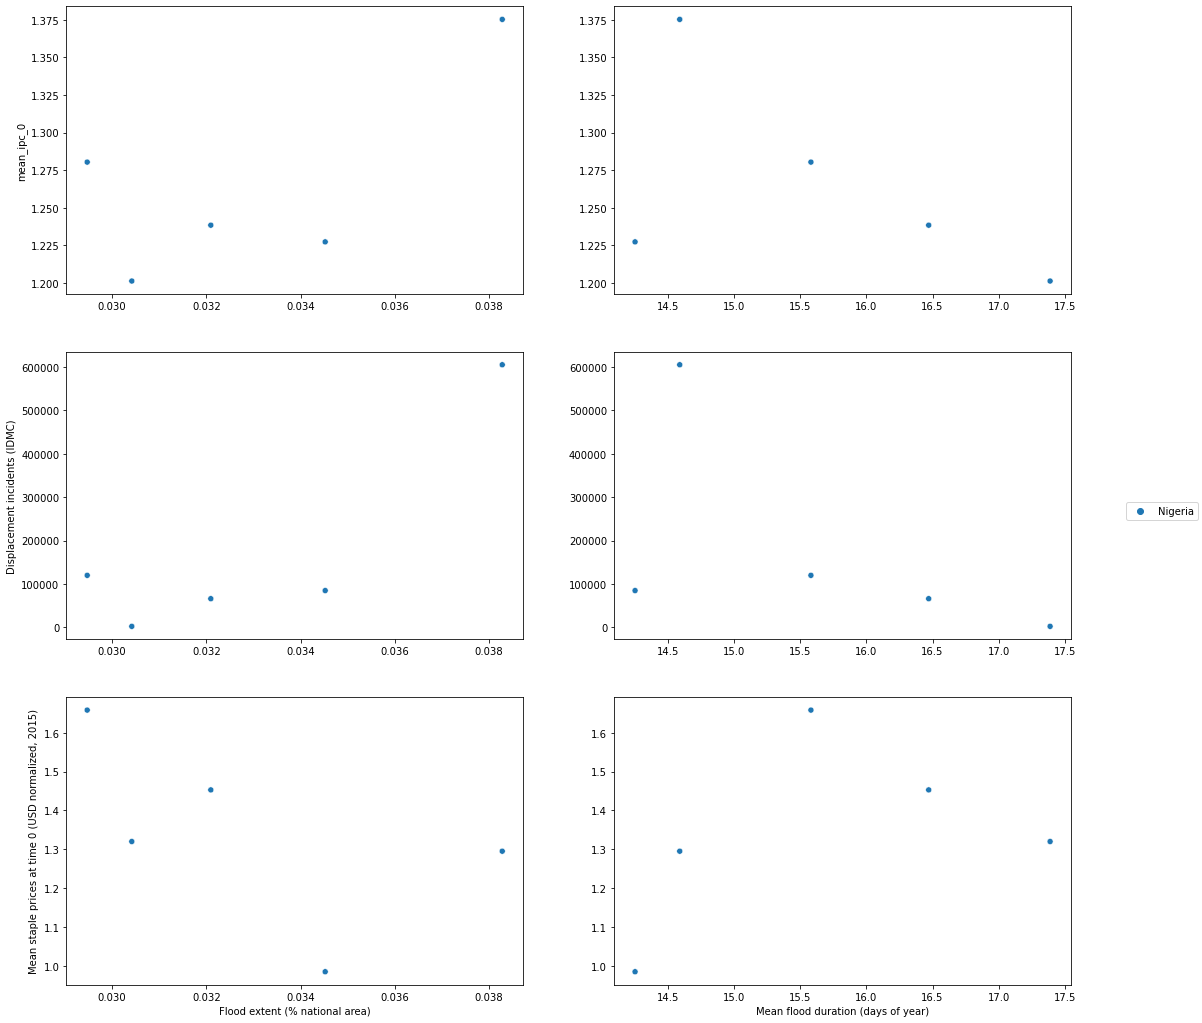

In [12]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 18))

sns.scatterplot(ax = ax[0][0], x = "flood_extent", y = "mean_ipc_0", hue = 'Name', data = df.loc[df['Name'] == 'Nigeria'], 
                legend = False).set(xlabel = None)
sns.scatterplot(ax = ax[0][1], x = "mean_flood_duration", y = "mean_ipc_0", hue = 'Name', data = df.loc[df['Name'] == 'Nigeria'], 
                legend = False).set(xlabel = None, ylabel = None)
sns.scatterplot(ax = ax[1][0], x = "flood_extent", y = "displaced_flood_idmc", 
            hue = 'Name', data = df.loc[df['Name'] == 'Nigeria'], legend = False).set(ylabel = "Displacement incidents (IDMC)", xlabel = None)
sns.scatterplot(ax = ax[1][1], x = "mean_flood_duration", y = "displaced_flood_idmc",
            hue = 'Name', data = df.loc[df['Name'] == 'Nigeria'], legend = False).set(ylabel = None, xlabel = None)
sns.scatterplot(ax = ax[2][0], x = "flood_extent", y = "mean_staple_price_0", 
            hue = 'Name', data = df.loc[df['Name'] == 'Nigeria'], legend = False).set(xlabel = 'Flood extent (% national area)', ylabel = "Mean staple prices at time 0 (USD normalized, 2015)")
sns.scatterplot(ax = ax[2][1], x = "mean_flood_duration", y = "mean_staple_price_0",
            hue = 'Name', data = df.loc[df['Name'] == 'Nigeria']).set(xlabel = 'Mean flood duration (days of year)', ylabel = None)

handles, labels = ax[2][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
ax[2][1].legend_.remove()


plt.show()